# Loading dataset

In [2]:
import pandas as pd

df_dataset = pd.read_csv('breast_cancer.csv', index_col=0)

df_dataset = df_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Defining features
df_x = df_dataset[['mean_concave_points','mean_perimeter','mean_fractal_dimension','worst_perimeter','worst_texture','worst_area']]

#Split the dataset 80% training 20% testing
train_size = int(0.8 * len(df_dataset))
train = df_dataset[:train_size]
test = df_dataset[train_size:]

# Defining features
df_x_train = train[['mean_concave_points','mean_perimeter','mean_fractal_dimension','worst_perimeter','worst_texture','worst_area']]
df_x_test = test[['mean_concave_points','mean_perimeter','mean_fractal_dimension','worst_perimeter','worst_texture','worst_area']]

# Defining labels
df_y_train = train['target']
df_y_test = test['target']

display(df_dataset)

,mean_concave_points,mean_perimeter,mean_fractal_dimension,worst_perimeter,worst_texture,worst_area,target
0,0.03821,81.09,0.06373,96.05,24.64,677.9,1
1,0.07951,123.60,0.05461,165.90,26.58,1866.0,0
2,0.08087,101.70,0.05796,124.90,26.00,1156.0,0
3,0.02799,81.47,0.07102,89.61,22.91,515.8,1
4,0.02594,74.65,0.06782,78.78,19.68,457.8,1
...,...,...,...,...,...,...,...
564,0.02872,58.79,0.08980,62.56,15.67,284.4,1
565,0.03485,75.17,0.06520,85.51,29.26,521.7,1
566,0.00625,90.30,0.05376,94.44,20.65,684.6,1
567,0.06463,91.12,0.06544,113.90,30.80,869.3,0


# Visualizing the data in a correlation matrix

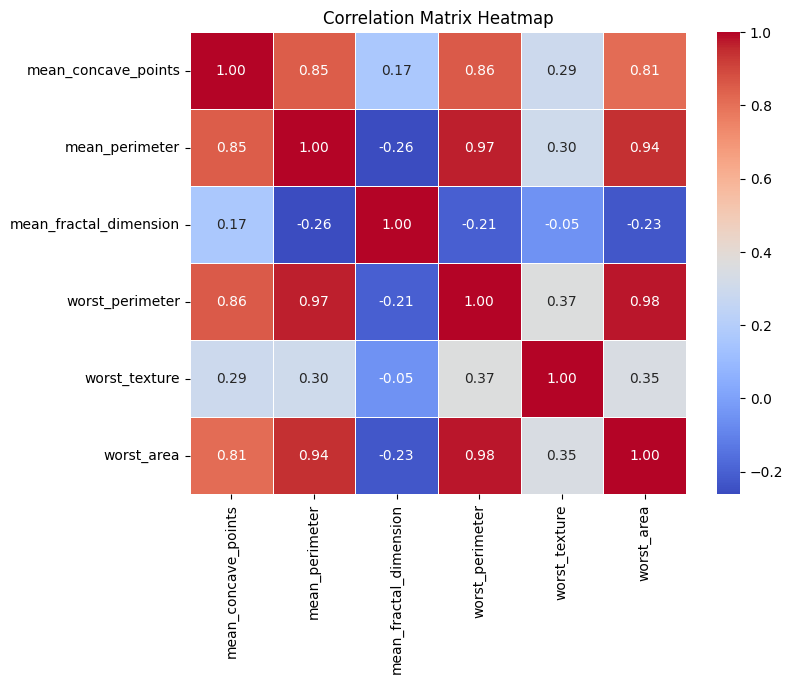

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_dataset[['mean_concave_points','mean_perimeter','mean_fractal_dimension','worst_perimeter','worst_texture','worst_area']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

# Questions

2 – Construa uma regressão linear para prever o tipo do tumor, indique as variaveis preditoras e as com
significancia marginal neste modelo. Dica, utilize o modulo “OLS” do “statsmodels”. Comente os
resultados obtidos.

In [4]:
import numpy as np

def accuracy_score(y_true: np.ndarray , y_pred: np.ndarray) -> float:
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0)) 
    FN = np.sum((y_pred == 0) & (y_true == 1)) 
    return (TP + TN) / (TP + TN + FP + FN)

def precision_score(y_true: np.ndarray , y_pred: np.ndarray) -> float:
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall_score(y_true: np.ndarray , y_pred: np.ndarray) -> float:
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score(y_true: np.ndarray , y_pred: np.ndarray) -> float:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def show_metrics(y_true: np.ndarray , y_pred: np.ndarray) -> None:
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    

In [5]:
import statsmodels.api as sm

x_train = sm.add_constant(df_x_train)
x_test = sm.add_constant(df_x_test)

res = sm.regression.linear_model.OLS(df_y_train, x_train).fit()
print(res.summary())

y_pred_prob = res.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          2.06e-117
Time:                        21:31:36   Log-Likelihood:                -29.892
No. Observations:                 455   AIC:                             73.78
Df Residuals:                     448   BIC:                             102.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

Métricas:

In [6]:
show_metrics(df_y_test,y_pred)

Acurácia: 0.9474
Precisão: 0.9178
Recall: 1.0000
F1-score: 0.9571


* Variáveis preditores
    - mean_concave_points
    - mean_perimeter
    - mean_fractal_dimension
    - worst_perimeter
    - worst_texture
    - worst_area  

* Variáveis preditoras significativas (P < 0.05)
    - mean_concave_points
    - mean_perimeter
    - worst_perimeter
    - worst_texture
    - worst_area
* Variáveis com significância marginal (0.1 > P >  0.05)
    - Nenhuma
* Variáveis não significativas (P >  0.1)
    - mean_fractal_dimension

Comentários: "O número da condição é grande, 2,52e+05. Isso pode indicar que há uma forte multicolinearidade ou outros problemas numéricos." A multicolinearidade indica quando variáveis independentes em uma equação de regressão linear estão correlacionadas. Variáveis multicolineares podem afetar negativamente as previsões do modelo em dados não vistos.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif["Variável"] = df_x.columns
df_vif["VIF"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]

df_vif = df_vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)

display(df_vif)

,Variável,VIF
0,worst_perimeter,589.245144
1,mean_perimeter,261.695188
2,worst_area,75.708306
3,mean_fractal_dimension,43.078446
4,worst_texture,21.956045
5,mean_concave_points,8.060909


Ao avaliar o VIF das variáveis independentes é possível notas que 'mean_perimeter', 'worst_perimeter', 'worst_area' possuem um VIF MUITO elevado e devem ser resolvidas para impedir que as previsões de dados não vistos pelo modelo sejam afetadas.

Possíveis soluções: Remover variáveis altamente correlacionadas ou aplicar Ridge Regression. 

3 – Construa uma regressão logistica para prever o tipo do tumor, indique as variaveis preditoras e as
com significancia marginal neste modelo. Dica utilize o modulo “GLM” do “statsmodels” com reposta
binomial. Comente os resultados obtidos.

In [8]:
res = sm.GLM(df_y_train, x_train, family=sm.families.Binomial()).fit()
print(res.summary())

y_pred_prob = res.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  455
Model:                            GLM   Df Residuals:                      448
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.261
Date:                Mon, 31 Mar 2025   Deviance:                       58.522
Time:                        21:31:36   Pearson chi2:                 5.16e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.6931
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

Métricas:

In [9]:
show_metrics(df_y_test,y_pred)

Acurácia: 0.9474
Precisão: 0.9420
Recall: 0.9701
F1-score: 0.9559


* Variáveis preditores
    - mean_concave_points
    - mean_perimeter
    - mean_fractal_dimension
    - worst_perimeter
    - worst_texture
    - worst_area
* Variáveis preditoras significativas(P < 0.05)
    - mean_concave_points
    - mean_perimeter
    - worst_texture
    - worst_area
* Variáveis com significância marginal (0.1 > P >  0.05)
    - Nenhuma
* Variáveis não significativas (P >  0.1)
    - mean_fractal_dimension
    - worst_perimeter